In [2]:
# This mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive')

# TODO: Enter the foldername in your Drive where you have saved the unzipped
FOLDERNAME =  "University\ of\ Cyprus/MSc\ Artificial\ Intelligence/NLP-Project"
assert FOLDERNAME is not None, "[!] Enter the foldername."

# Now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))
%cd /content/drive/My\ Drive/$FOLDERNAME/
!ls

Mounted at /content/drive
/content/drive/My Drive/University of Cyprus/MSc Artificial Intelligence/NLP-Project
cache							  lstm_model.py
cached_lm_GPT2TokenizerFast_1024_positive_tweet.txt	  Main.ipynb
cached_lm_GPT2TokenizerFast_1024_positive_tweet.txt.lock  main.py
cardiffnlp						  output
data							  positive_tweet.txt
DataAnalysis.ipynb					  preprocessing.py
DatasetsJoin.ipynb					  __pycache__
Finetune.ipynb						  slangdict.pickle
finetune.py						  wandb
GPT-2.ipynb
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/University of Cyprus/MSc Artificial Intelligence/NLP-Project
cache							  lstm_model.py
cached_lm_GPT2TokenizerFast_1024_positive_tweet.txt	  Main.ipynb
cached_lm_GPT2TokenizerFast_1024_positive_tweet.txt.lock  main.py
cardiffnlp						  output
data							  positive_tweet.txt
DataAnalysis.ipynb					  preprocessing.py
DatasetsJoin.ipynb					  __pycache__
Finetune.

In [3]:
from IPython.display import clear_output

!pip install datasets  ekphrasis transformers wordcloud

clear_output()

In [4]:
int_to_label = {2: 'Positive', 1: 'Neutral', 0: 'Negative'}

In [5]:
from preprocessing import *

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
/usr/local/lib/python3.10/dist-packages/ekphrasis/classes/tokenizer.py:225: FutureWarning: Possible nested set at position 2190
  self.tok = re.compile(r"({})".format("|".join(pipeline)))


Word statistics files not found!
Downloading... done!
Unpacking... done!
Reading twitter - 1grams ...
generating cache file for faster loading...
reading ngrams /root/.ekphrasis/stats/twitter/counts_1grams.txt
Reading twitter - 2grams ...
generating cache file for faster loading...
reading ngrams /root/.ekphrasis/stats/twitter/counts_2grams.txt


/usr/local/lib/python3.10/dist-packages/ekphrasis/classes/exmanager.py:14: FutureWarning: Possible nested set at position 42
  regexes = {k.lower(): re.compile(self.expressions[k]) for k, v in
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Reading twitter - 1grams ...
profit - taking hits nikkei nt <url> <url> rt <user>
!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [6]:
tweets_df = read_data("data/tweets_company.csv")

In [7]:
print("The dataset consist of", tweets_df.shape[0], "tweets")

The dataset consist of 4280526 tweets


In [8]:
tweets_df.head()

,Unnamed: 0,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol
0,0,550441509175443456,VisualStockRSRC,2015-01-01,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,AAPL
1,1,550441672312512512,KeralaGuy77,2015-01-01,Insanity of today weirdo massive selling. $aap...,0,0,0,AAPL
2,2,550441732014223360,DozenStocks,2015-01-01,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0,AMZN
3,3,550442977802207232,ShowDreamCar,2015-01-01,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1,TSLA
4,4,550443807834402816,i_Know_First,2015-01-01,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL


Text(0, 0.5, 'Count')

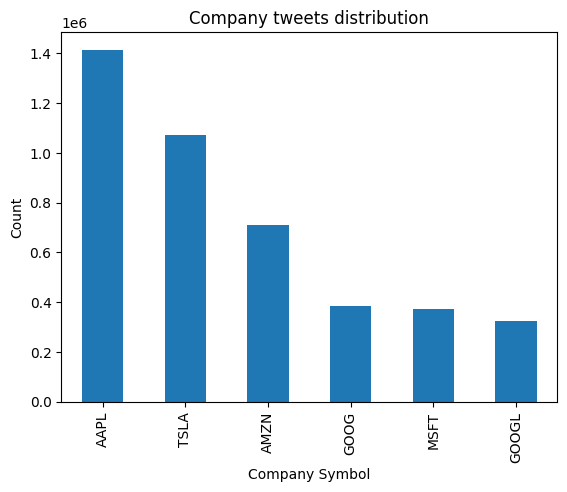

In [9]:
import matplotlib.pyplot as plt

# Plot a bar plot of the 'age' column
tweets_df['ticker_symbol'].value_counts().plot.bar()

# Add title and labels
plt.title('Company tweets distribution')
plt.xlabel('Company Symbol')
plt.ylabel('Count')

# Show the p

In [10]:
msft_df = tweets_df[tweets_df['ticker_symbol'] == 'MSFT']
aapl_df = tweets_df[tweets_df['ticker_symbol'] == 'AAPL']
tsla_df = tweets_df[tweets_df['ticker_symbol'] == 'TSLA']

In [11]:
print("Microsoft tweets length:", msft_df.shape[0], "tweets")
print("Apple tweets length:", aapl_df.shape[0], "tweets")
print("Tesla tweets length:", tsla_df.shape[0], "tweets")

Microsoft tweets length: 373798 tweets
Apple tweets length: 1414802 tweets
Tesla tweets length: 1073202 tweets


In [12]:
import  re, string, nltk

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download("stopwords")
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [13]:
import itertools
from functools import reduce


def unique_count(tokens):
    return len(set(tokens))


def all_tokens(df, col_name):
    return reduce ( lambda x,y:   list(itertools.chain( x,y)), df[col_name].map(lambda x: tokenize(x)))


def token_decrease_percentage(current_counts, previous_counts):
   token_decrease = {}
   token_decrease['positive'] = (previous_counts['positive'] -current_counts['positive']) / previous_counts['positive'] *100

In [14]:
def tweet_tokenize(s):
  return " ".join(tokenize(s))

In [16]:
msft_df['body'] = msft_df['body'].map(lambda q: tweet_tokenize(q))
#aapl_df['body'] = aapl_df['body'].map( lambda q: tweet_tokenize(q))
tsla_df['body'] = tsla_df['body'].map( lambda q: tweet_tokenize(q))

<ipython-input-16-621d9fac0994>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  msft_df['body'] = msft_df['body'].map(lambda q: tweet_tokenize(q))
<ipython-input-16-621d9fac0994>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsla_df['body'] = tsla_df['body'].map( lambda q: tweet_tokenize(q))


In [21]:
def token_info(msft_df, tsla_df , df_column):

    

    msft_counts = reduce ( lambda x,y: x+y, msft_df['body'].map(lambda x: unique_count(x)))
    tsla_counts = reduce ( lambda x,y: x+y, tsla_df['body'].map(lambda x: unique_count(x)))
    
    token_dimensionality_dict = {}

    token_dimensionality_dict['msft'] = msft_counts
    token_dimensionality_dict['tsla'] = tsla_counts

    return token_dimensionality_dict

In [33]:
def token_decrease_percentage(current_counts, previous_counts):
   token_decrease = {}
   token_decrease['msft'] = (previous_counts['msft'] -current_counts['msft']) / previous_counts['msft'] *100

   token_decrease['tsla'] = (previous_counts['tsla'] -current_counts['tsla']) / previous_counts['tsla'] * 100
  
   return token_decrease

In [18]:
msft_df['body'] = msft_df['body'].map(lambda x: ekphrasis_removal(x))
tsla_df['body'] = tsla_df['body'].map(lambda x: ekphrasis_removal(x))

msft_df['body'] = msft_df['body'].map(lambda x: uncontract(x))
tsla_df['body'] = tsla_df['body'].map(lambda x: uncontract(x))

msft_df['body'] = msft_df['body'].map(lambda x: remove_url_email(x))
tsla_df['body'] = tsla_df['body'].map(lambda x: remove_url_email(x))


<ipython-input-18-88284ffe040b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  msft_df['body'] = msft_df['body'].map(lambda x: ekphrasis_removal(x))
<ipython-input-18-88284ffe040b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsla_df['body'] = tsla_df['body'].map(lambda x: ekphrasis_removal(x))
<ipython-input-18-88284ffe040b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [22]:
token_info_dict = token_info(msft_df, tsla_df, 'body')


{'msft': 9600658, 'tsla': 26674207}

In [31]:
counts_1 = {'msft': 9600658, 'tsla': 26674207}

In [25]:
msft_df['body'] = msft_df['body'].map(lambda x: lower(x))
tsla_df['body'] = tsla_df['body'].map(lambda x: lower(x))

msft_df['body'] = msft_df['body'].map(lambda x: punctuation(x))
tsla_df['body'] = tsla_df['body'].map(lambda x: punctuation(x))


<ipython-input-25-c75929db50c5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  msft_df['body'] = msft_df['body'].map(lambda x: lower(x))
<ipython-input-25-c75929db50c5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsla_df['body'] = tsla_df['body'].map(lambda x: lower(x))
<ipython-input-25-c75929db50c5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

In [26]:
token_info_dict = token_info(msft_df, tsla_df, 'body')
token_info_dict 

{'msft': 7594739, 'tsla': 21515563}

In [35]:
perc_low = token_decrease_percentage( token_info_dict, counts_1)
perc_low

{'msft': 20.893557504079407, 'tsla': 19.33944652975063}

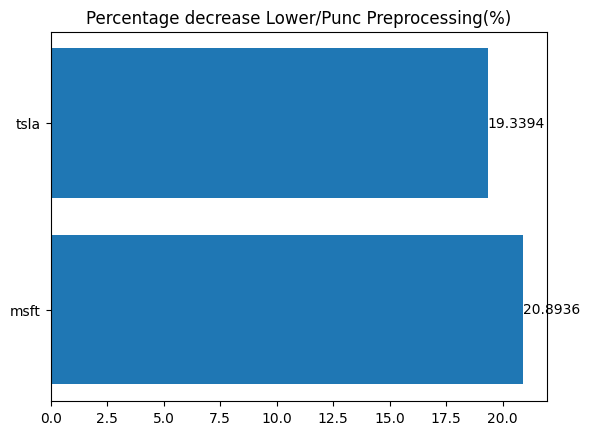

In [36]:
import matplotlib.pyplot as plt

fig1, ax1 = plt.subplots()
bars = ax1.barh( list(perc_low.keys()), list(perc_low.values()))
ax1.bar_label(bars)

ax1.set_title("Percentage decrease Lower/Punc Preprocessing(%)")

plt.show()

In [39]:
msft_df['body'] = msft_df['body'].map(lambda x: stopword_removal(x))
tsla_df['body'] = tsla_df['body'].map(lambda x: stopword_removal(x))

<ipython-input-39-aeb3746e9292>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  msft_df['body'] = msft_df['body'].map(lambda x: stopword_removal(x))
<ipython-input-39-aeb3746e9292>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsla_df['body'] = tsla_df['body'].map(lambda x: stopword_removal(x))


In [40]:
token_info_dict_stop = token_info(msft_df, tsla_df, 'body')
token_info_dict_stop

{'msft': 4806046, 'tsla': 13539229}

In [42]:
perc_low_stop = token_decrease_percentage( token_info_dict_stop, token_info_dict)
perc_low_stop

{'msft': 36.71874701684943, 'tsla': 37.07239266757742}

<Figure size 640x480 with 0 Axes>

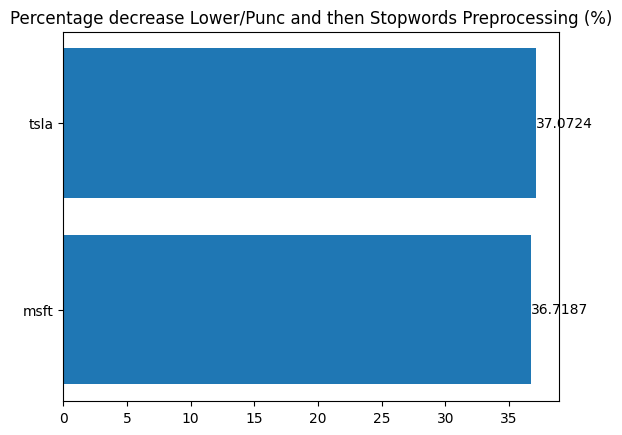

In [43]:
plt.clf()

fig2, ax2 = plt.subplots()
bars = ax2.barh( list(perc_low_stop.keys()), list(perc_low_stop.values()))
ax2.bar_label(bars)

ax2.set_title("Percentage decrease Lower/Punc and then Stopwords Preprocessing (%)")

plt.show()

In [45]:
msft_df['body'] = msft_df['body'].map(lambda x: lemmatize(x))
tsla_df['body'] = tsla_df['body'].map(lambda x: lemmatize(x))

<ipython-input-45-c22a920a575c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  msft_df['body'] = msft_df['body'].map(lambda x: lemmatize(x))
<ipython-input-45-c22a920a575c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsla_df['body'] = tsla_df['body'].map(lambda x: lemmatize(x))


In [46]:
token_info_dict_stop_lemma = token_info(msft_df, tsla_df, 'body')
token_info_dict_stop_lemma

{'msft': 4806046, 'tsla': 13539229}

In [47]:
perc_low_stop_lemma = token_decrease_percentage( token_info_dict_stop_lemma, token_info_dict_stop)
perc_low_stop_lemma

{'msft': 0.0, 'tsla': 0.0}

<Figure size 640x480 with 0 Axes>

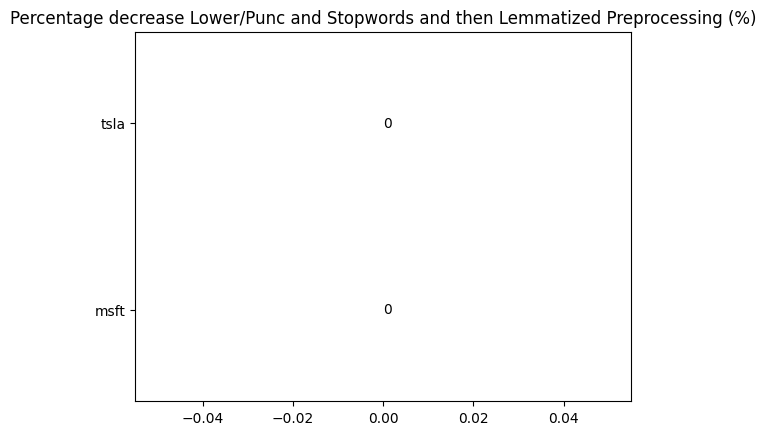

In [48]:
plt.clf()

fig, ax3 = plt.subplots()
bars = ax3.barh( list(perc_low_stop_lemma.keys()), list(perc_low_stop_lemma.values()))
ax3.bar_label(bars)

ax3.set_title("Percentage decrease Lower/Punc and Stopwords and then Lemmatized Preprocessing (%)")

plt.show()

In [49]:
msft_counts=nltk.FreqDist(all_tokens(msft_df,'body'))
tsla_counts=nltk.FreqDist(all_tokens(tsla_df,'body'))


KeyboardInterrupt: ignored